<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
## Write your code here
column_names=column_names = df.columns.tolist()
print("Column Names:")
print(column_names)
data_types = df.dtypes
print("\nData Types:")
print(data_types)
print("\nDataset Info:")
df.info()
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe().to_string()) # .to_string() prevents truncation for wide tables

Column Names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [5]:
## Write your code here
!pip install scikit-learn
import re
from sklearn.impute import SimpleImputer, KNNImputer

missing_values = df.isnull().sum().to_string()
print(missing_values)
missing_percentage = df.isnull().mean()
print(missing_percentage.to_string())
df_drop_all_na = df.dropna(how='all')
print("\nDataFrame after dropping rows where all values are missing:")
print(df_drop_all_na)
df.fillna({'MainBranch': df['MainBranch'].mode()[0]}, inplace=True)

def extract_age(age_str):
    if pd.isna(age_str):
        return None
    numbers = re.findall(r'\d+', str(age_str))
    if len(numbers) == 1:
        return int(numbers[0])
    elif len(numbers) == 2:
        return (int(numbers[0]) + int(numbers[1])) / 2
    else:
        return None

#df.dropna(inplace=True)
# Verify no missing values remain
print(df.isnull().sum().to_string())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 101.4 MB/s eta 0:00:00a 0:00:01
ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
## Write your code here

print("Employment Distribution:")
print(df['Employment'].value_counts(dropna=False))  

print("\nJob Satisfaction (JobSat) Distribution:")
print(df['JobSat'].value_counts(dropna=False))

print("\nProfessional Coding Experience (YearsCodePro) Distribution:")
print(df['YearsCodePro'].value_counts(dropna=False))

Employment Distribution:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking fo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


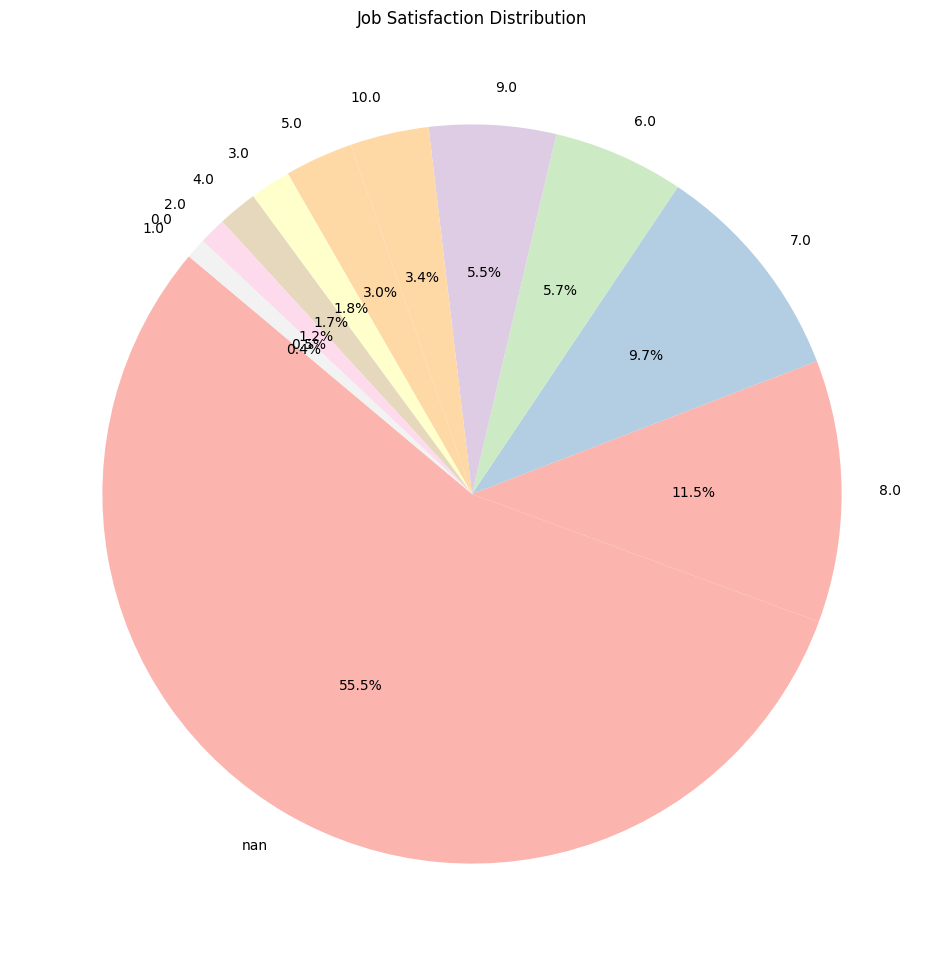

In [7]:
## Write your code here
import matplotlib.pyplot as plt

# Count the values including missing data
job_sat_counts = df['JobSat'].value_counts(dropna=False)

# Create pie chart
plt.figure(figsize=(15,12))
job_sat_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Pastel1')
plt.title('Job Satisfaction Distribution')
plt.ylabel('')  # Hide y-label for clarity
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


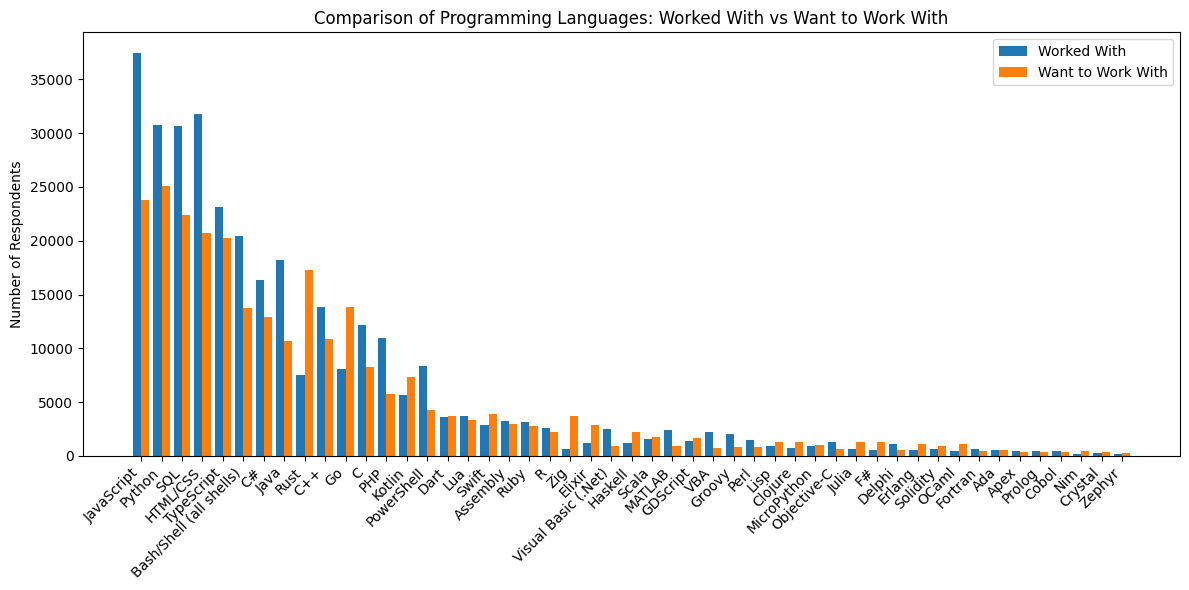

  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=4fe42685f449d7fbc0cd56cef8202725fbb2bba101587a9c0ba8acf060ef9348
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


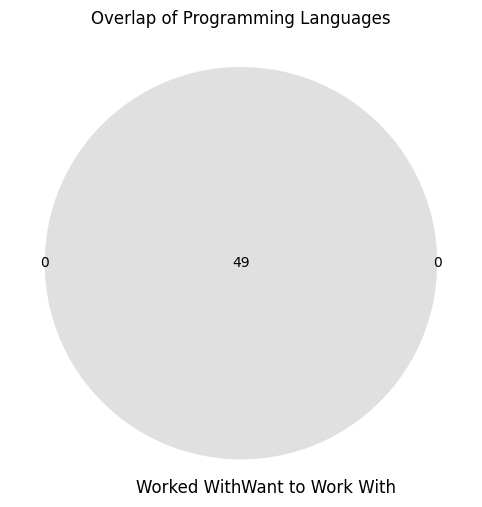

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Split and count languages respondents have worked with
worked_with = df['LanguageHaveWorkedWith'].dropna().str.split(';')
worked_with_flat = [lang for sublist in worked_with for lang in sublist]
worked_counts = Counter(worked_with_flat)

# Split and count languages respondents want to work with
want_to_work_with = df['LanguageWantToWorkWith'].dropna().str.split(';')
want_flat = [lang for sublist in want_to_work_with for lang in sublist]
want_counts = Counter(want_flat)
# Create DataFrame for plotting
languages = list(set(worked_counts.keys()).union(set(want_counts.keys())))
worked_freq = [worked_counts.get(lang, 0) for lang in languages]
want_freq = [want_counts.get(lang, 0) for lang in languages]

freq_df = pd.DataFrame({
    'Language': languages,
    'Worked With': worked_freq,
    'Want to Work With': want_freq
})

# Sort by total frequency
freq_df['Total'] = freq_df['Worked With'] + freq_df['Want to Work With']
freq_df = freq_df.sort_values(by='Total', ascending=False)

# Plot
plt.figure(figsize=(12,6))
bar_width = 0.4
x = range(len(freq_df))

plt.bar(x, freq_df['Worked With'], width=bar_width, label='Worked With', align='center')
plt.bar([i + bar_width for i in x], freq_df['Want to Work With'], width=bar_width, label='Want to Work With', align='center')

plt.xticks([i + bar_width / 2 for i in x], freq_df['Language'], rotation=45, ha='right')
plt.ylabel('Number of Respondents')
plt.title('Comparison of Programming Languages: Worked With vs Want to Work With')
plt.legend()
plt.tight_layout()
plt.show()
!pip install matplotlib-venn
from matplotlib_venn import venn2

# Convert to sets
worked_set = set(worked_counts.keys())
want_set = set(want_counts.keys())

plt.figure(figsize=(6,6))
venn2([worked_set, want_set], set_labels=('Worked With', 'Want to Work With'), set_colors=('black', 'white'))
plt.title('Overlap of Programming Languages')
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


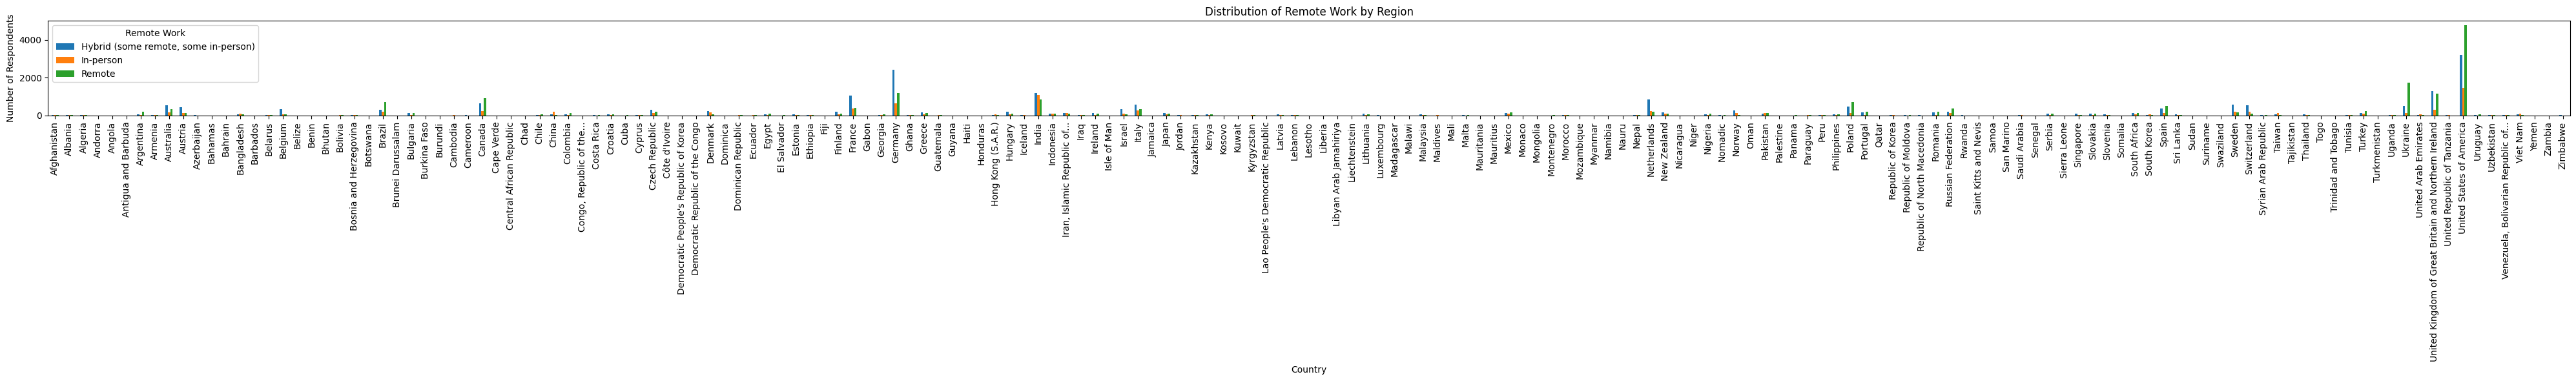

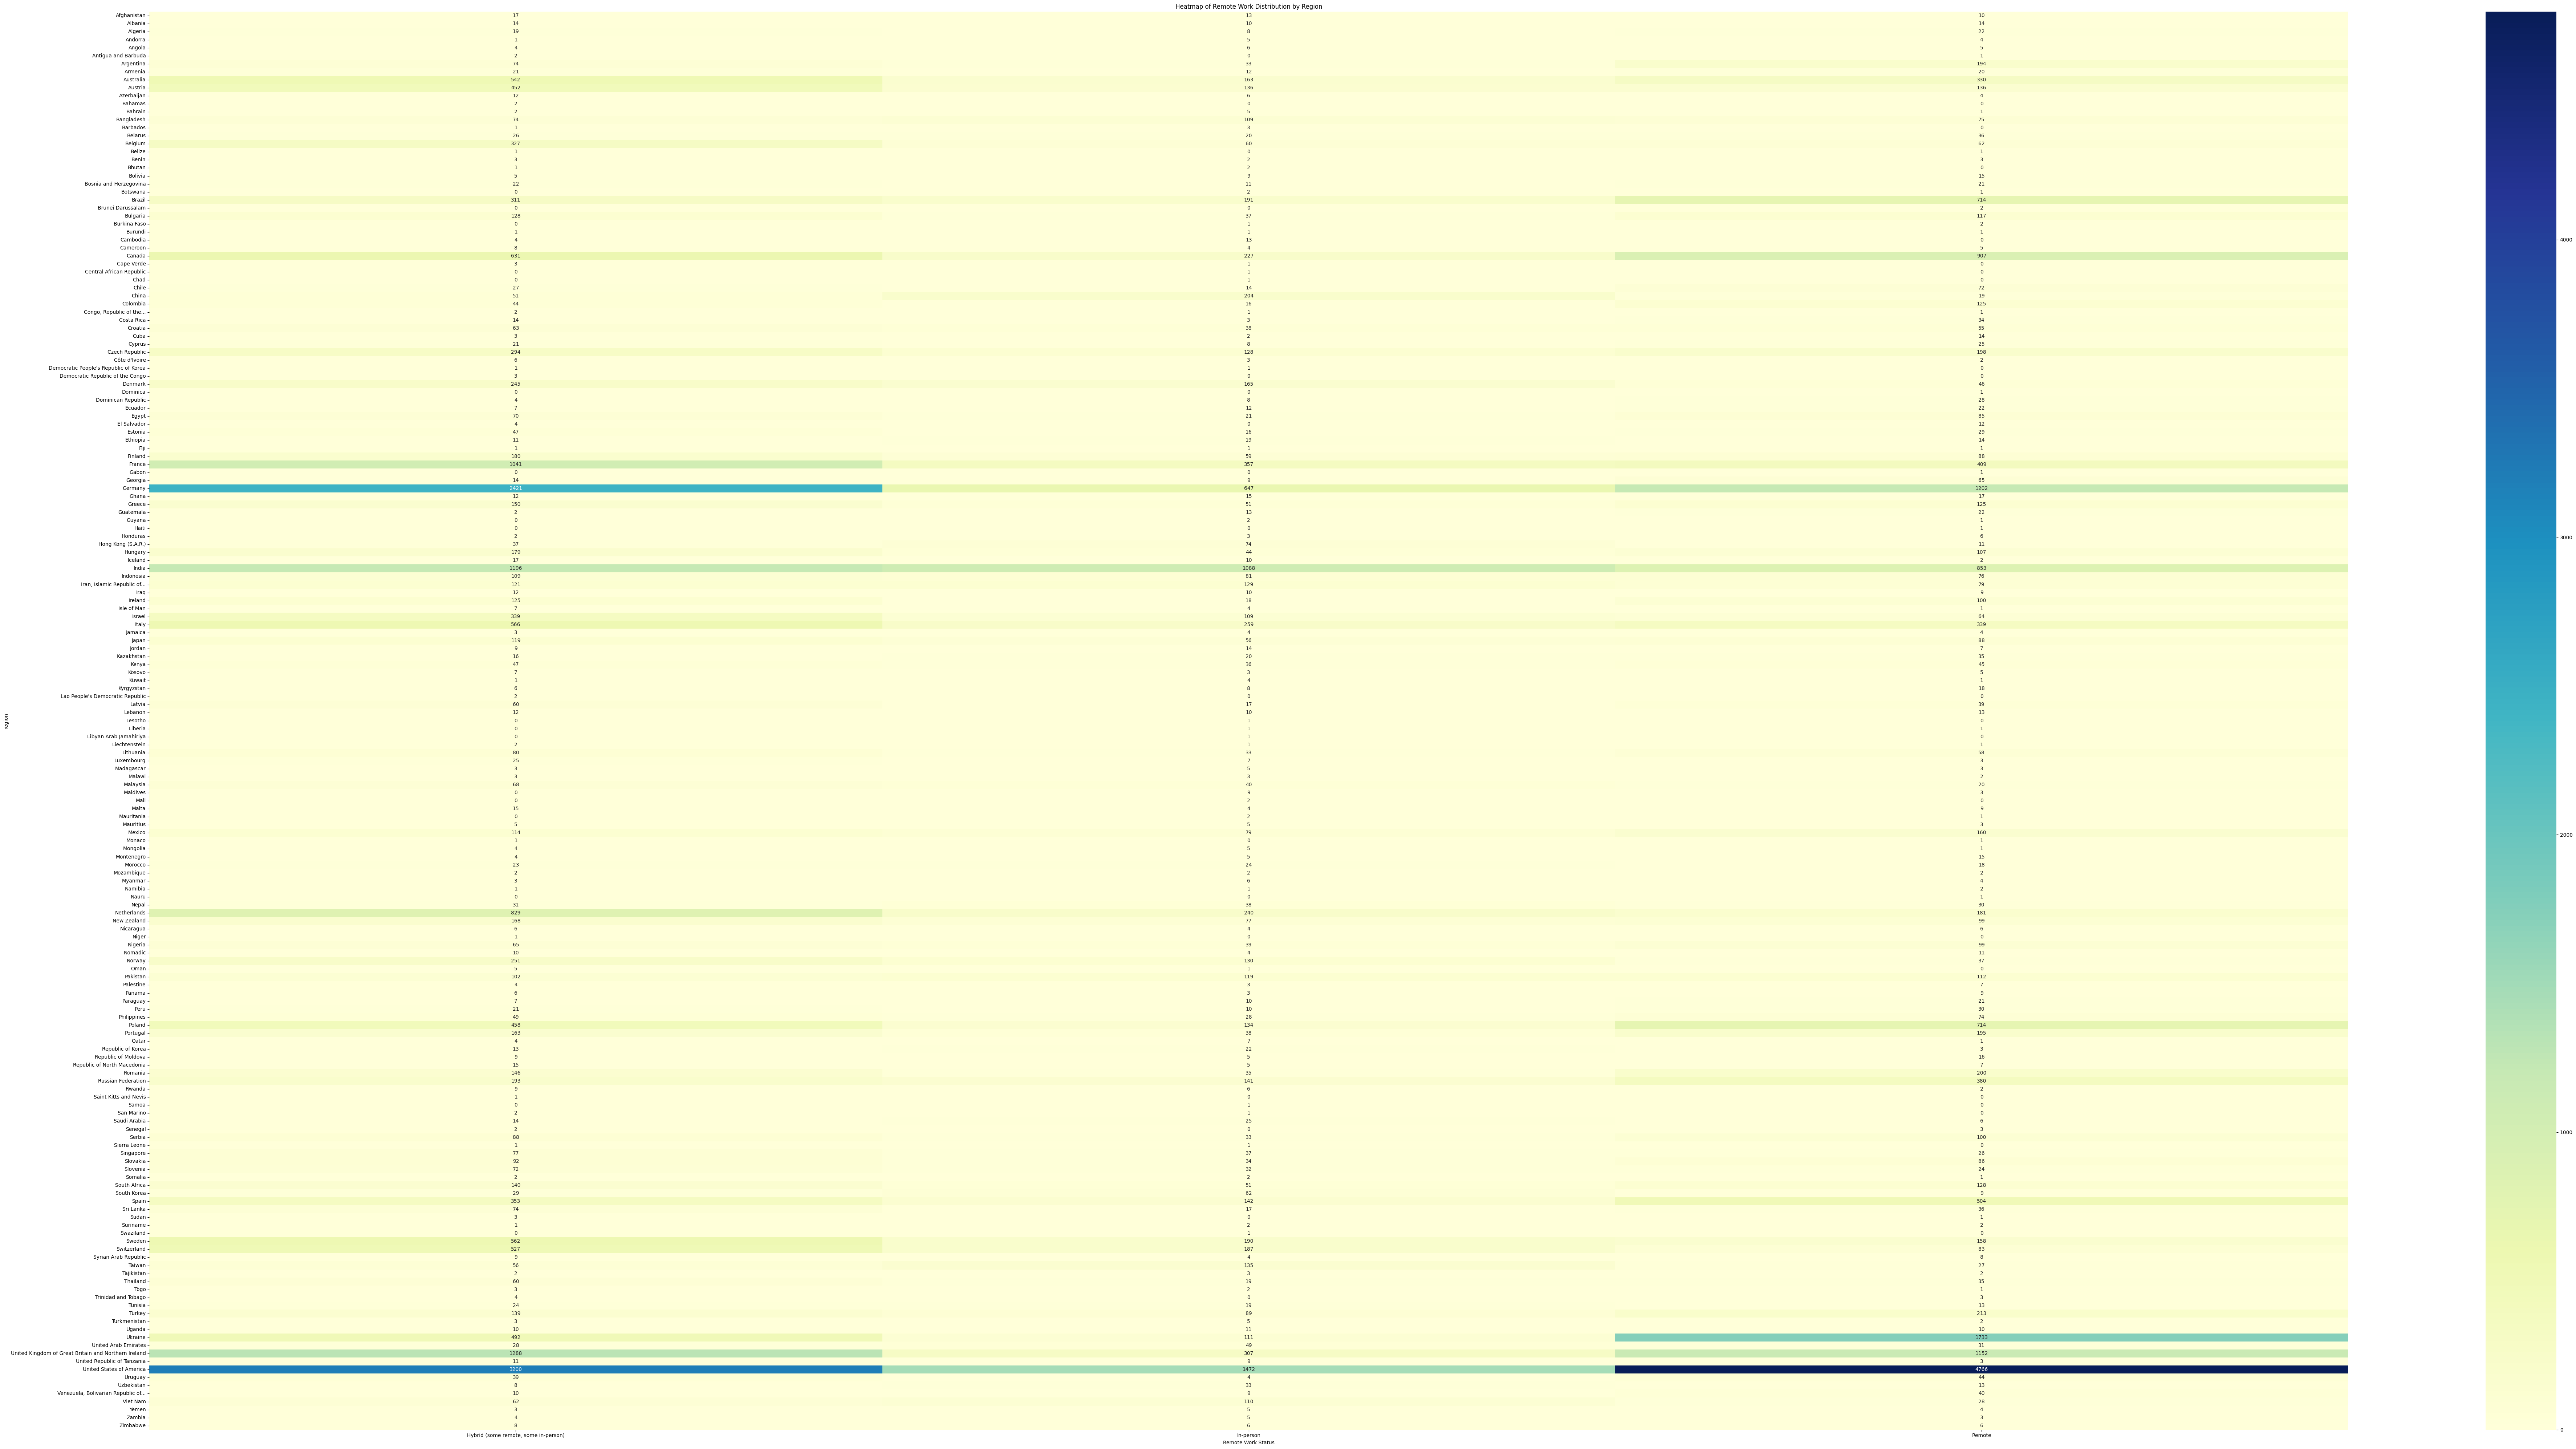

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

remote_region_ct = pd.crosstab(df['Country'], df['RemoteWork'])

# Plot grouped bar chart
remote_region_ct.plot(kind='bar', figsize=(40,6))

plt.title('Distribution of Remote Work by Region')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.legend(title='Remote Work')
plt.tight_layout()
plt.show()
# Using the same crosstab from above
plt.figure(figsize=(80,40))
sns.heatmap(remote_region_ct, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Remote Work Distribution by Region')
plt.xlabel('Remote Work Status')
plt.ylabel('region')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [11]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df = df.dropna(subset=['YearsCodePro'])
df.fillna({'YearsCodePro':df['YearsCodePro'].median()}, inplace=True)
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()
print(median_satisfaction)
!pip install scipy
# Drop rows where YearsCodePro or JobSat is missing
df_clean = df.dropna(subset=['YearsCodePro', 'JobSat'])
# Pearson correlation (linear relationship)
pearson_corr = df_clean['YearsCodePro'].corr(df_clean['JobSat'])
print(f'Pearson correlation: {pearson_corr:.3f}')

# Spearman correlation (rank-based, less sensitive to outliers)
spearman_corr = df_clean['YearsCodePro'].corr(df_clean['JobSat'], method='spearman')
print(f'Spearman correlation: {spearman_corr:.3f}')


/tmp/ipykernel_574/1627630370.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()


ExperienceRange
0-5      7.0
5-10     7.0
10-20    7.0
>20      8.0
Name: JobSat, dtype: float64
Pearson correlation: 0.103
Spearman correlation: 0.121


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                            0.674983   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   0.727881   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                0.727318   
Primary/elementary school                                      0.457045   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                 0.743144   
Secondary school (e.g. American high school, Ge...             0.492314   
Some college/university study without earning a...             0.584906   
Something else                                                 0.596623   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

/tmp/ipykernel_574/4274785690.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


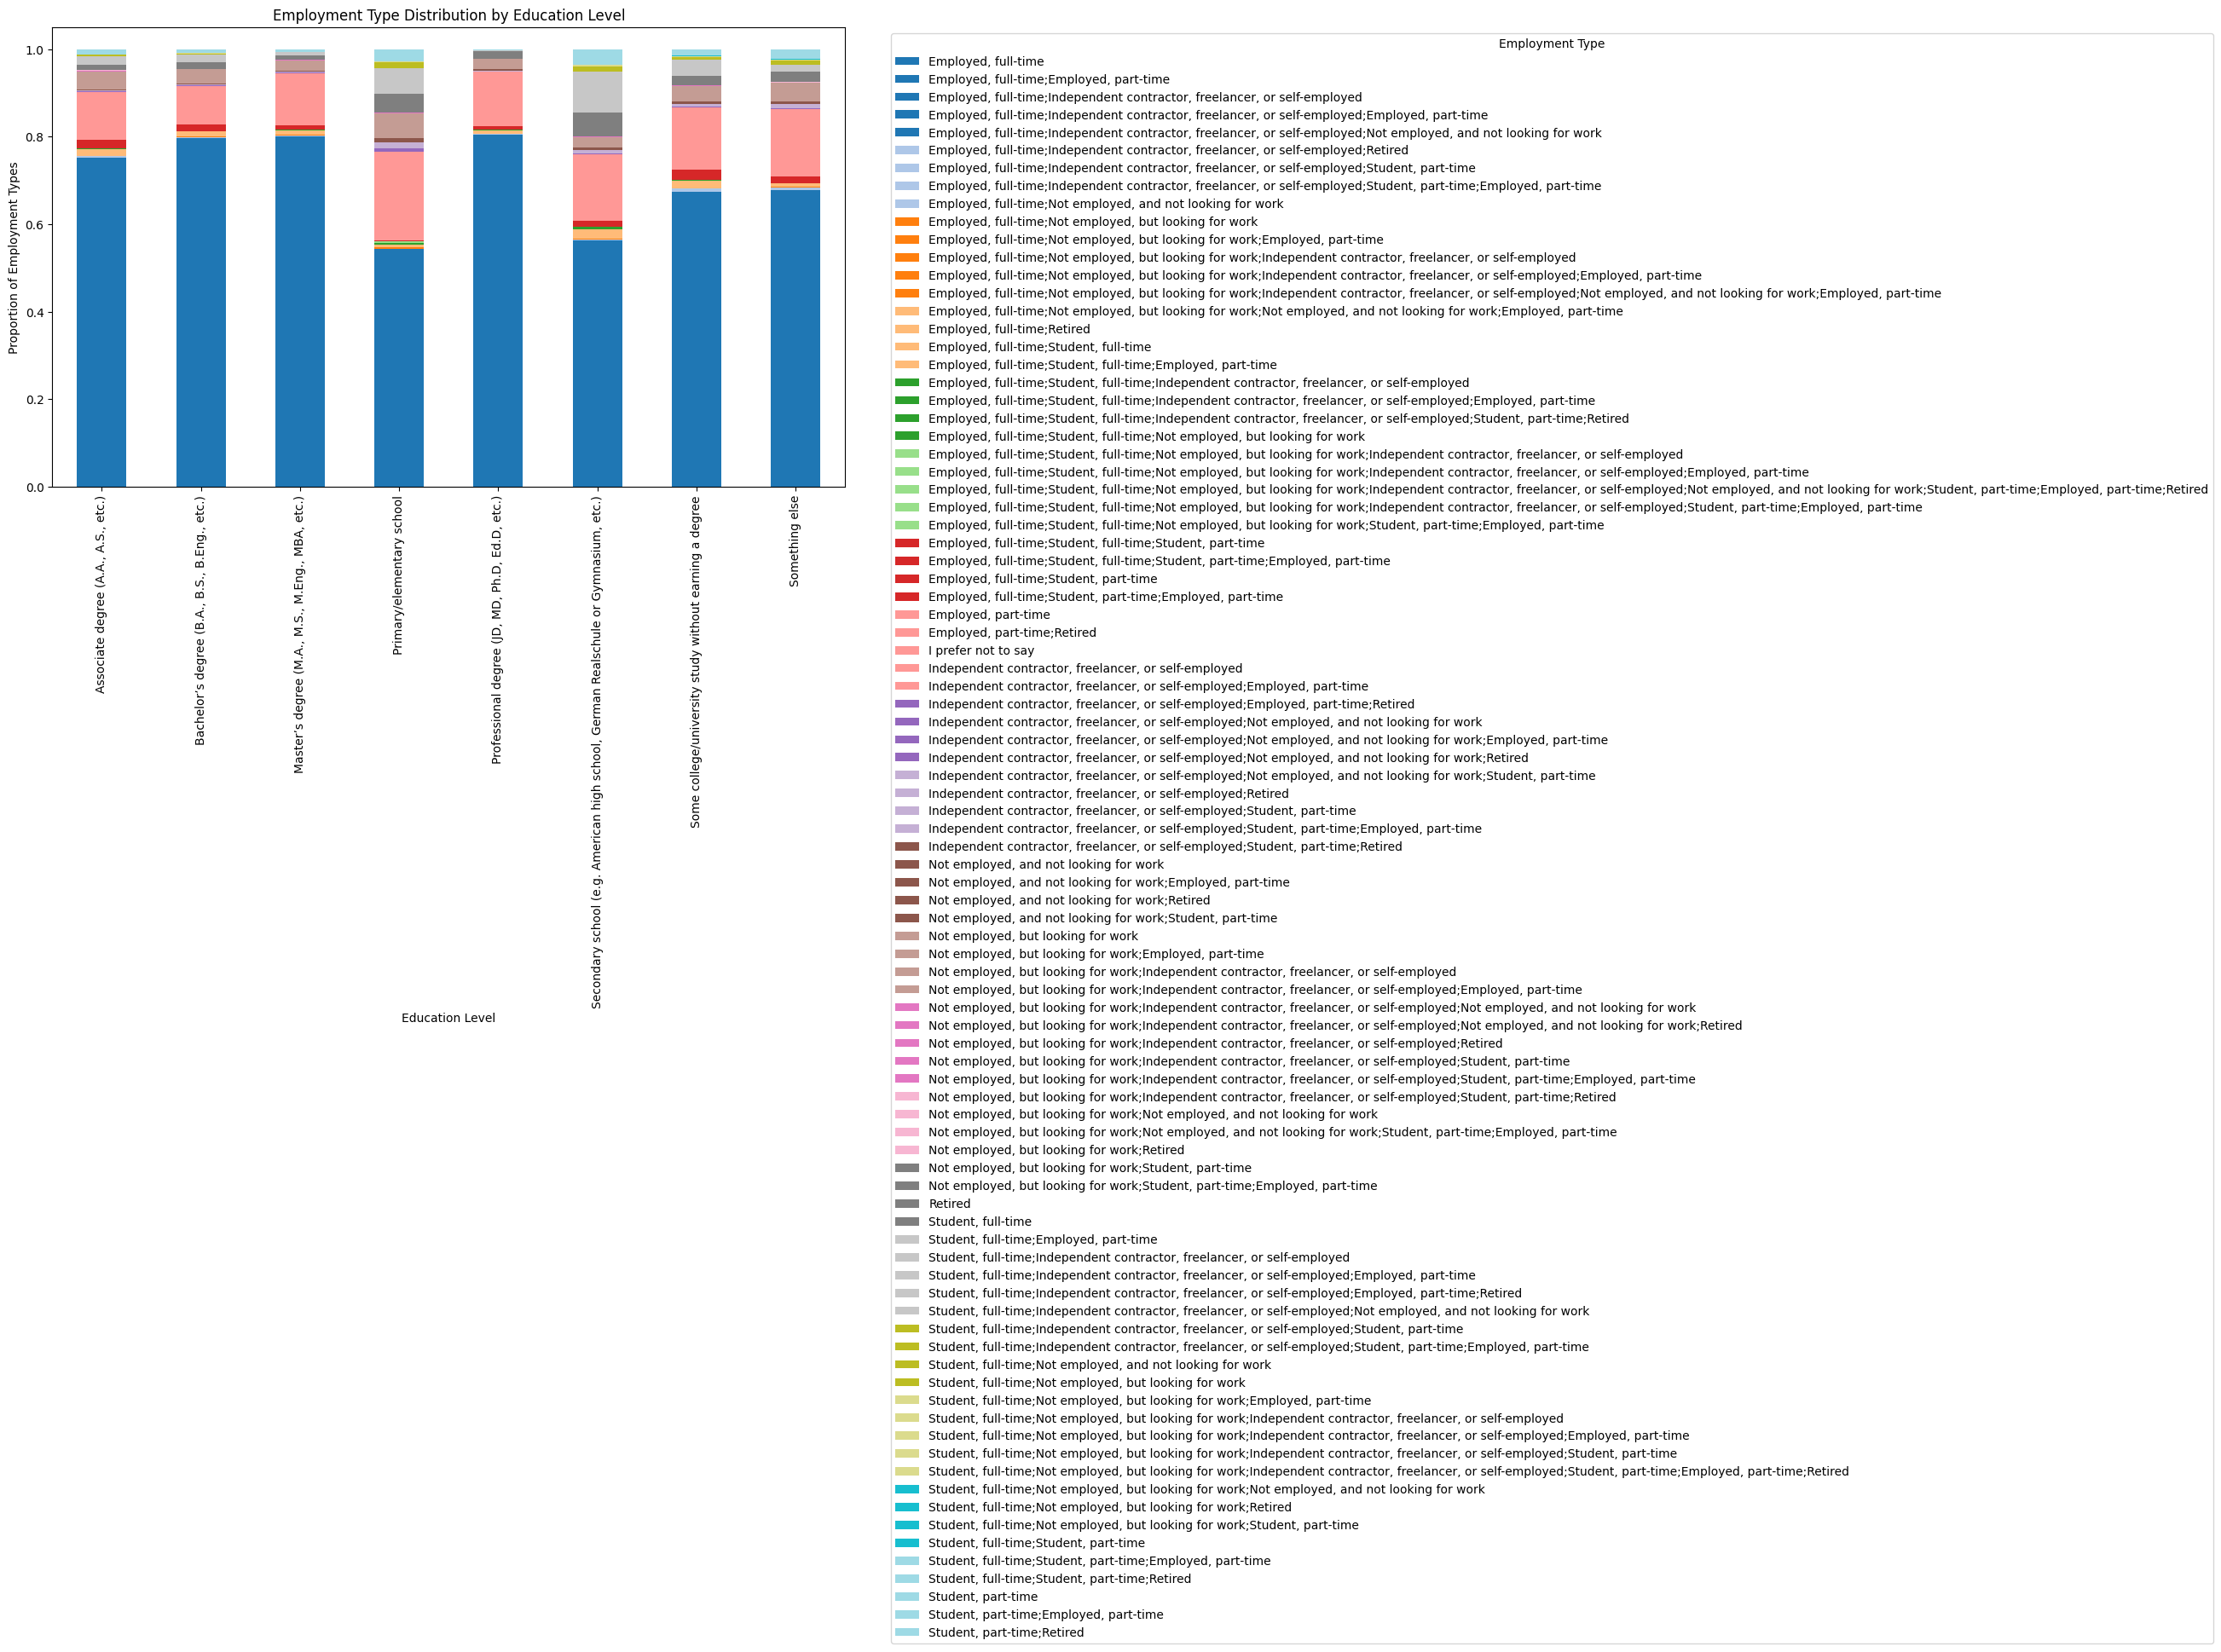

In [12]:
## Write your code here
# Create a cross-tabulation table
education_employment_ct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')  # normalize by education level

# Display the table
print(education_employment_ct)
import matplotlib.pyplot as plt

# Plot stacked bar chart
education_employment_ct.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Employment Types')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [30]:
## Write your code here
df_clean.to_csv('cleaned_survey_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
